# Watson Speech to Text Translator

## Objectives
*   Operate a Speech to Text Translator through an API


### Introduction

In this notebook, you will:
* We will discuss Application Program Interfaces that use some kind of artificial intelligence.
* Learn to convert an audio file of an English speaker to text using a Speech to Text API. 
* Translate the English version to a Spanish version using a Language Translator API. 

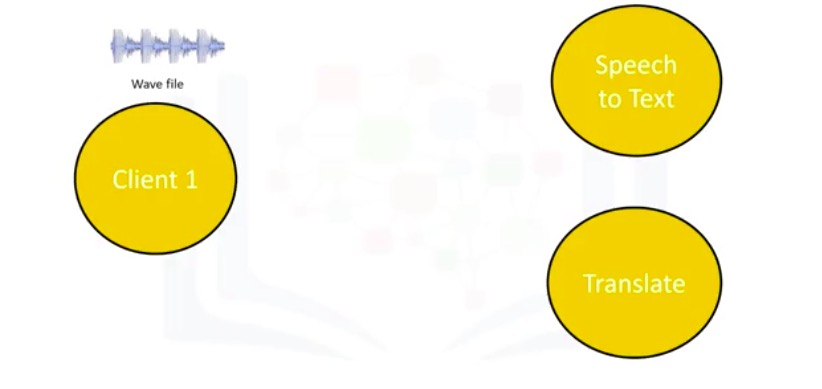

* In the API call, you will send a copy of the audio file to the API. This is sometimes called a POST request. 
* Then the API will send the text transcription of what the individual is saying. Under the hood, the API is making a GET request.
* We then send the text we would like to translate into a second language to a second API. The API will translate the text and send the translation back to you. In this case, we translate English to Spanish.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Table of Contents</h2>
<ul>
    <li><a href="https://#ref0">API keys and endpoints - gives access to the API.</a></li>
    <li><a href="https://#ref0">Speech To Text</a></li>
    <li><a href="https://#ref1">Language Translator</a></li>
    <li><a href="https://#ref2">Exercise</a></li>
</ul>
</div>


### API Keys 

* An API key as a way to access the API.
* It's a unique set of characters that the API uses to identify you and authorize you. 
* Usually, your first call to the API includes the API key.
* This will allow you access to the API.
* In many APIs, you may get charged for each call. So like your password, you should keep your API key a secret.

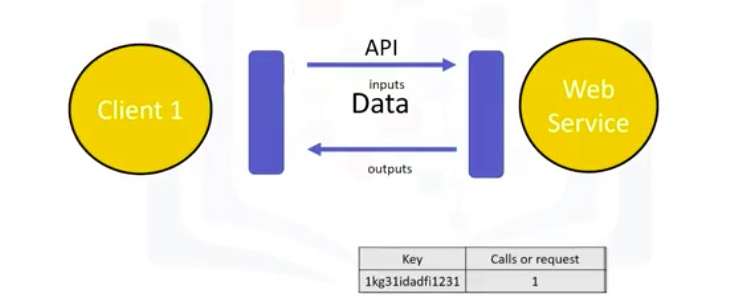

### API Endpoints

An endpoint is simply the location of the service. It's used to find the API on the Internet just like a web address.

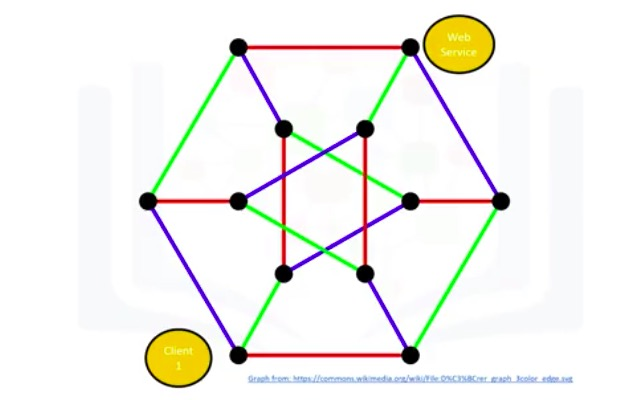

In [1]:
#you will need the following library 
!pip install ibm_watson wget

<h2 id="ref0">Speech to Text</h2>


Now, we will transcribe an audio file using the Watson Text to Speech API. 

<p>First we import <code>SpeechToTextV1</code> from <code>ibm_watson</code>. For more information on the API, please click on this <a href="https://cloud.ibm.com/apidocs/speech-to-text?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&code=python">link</a>.</p>


In [2]:
from ibm_watson import SpeechToTextV1 
import json
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

<p>The service endpoint is based on the location of the service instance. We store the information in the variable URL. To find out which URL to use, view the service credentials and paste the url here.</p>


In [3]:
url_s2t = 

<p>You require an API key, and you can obtain the key on the <a href="https://cloud.ibm.com/resources?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Dashboard </a>.</p>


In [4]:
iam_apikey_s2t = 

<p>You create a <a href="http://watson-developer-cloud.github.io/python-sdk/v0.25.0/apis/watson_developer_cloud.speech_to_text_v1.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Speech To Text Adapter object.</a> The parameters are the endpoint and API key.</p>


In [5]:
authenticator = IAMAuthenticator(iam_apikey_s2t)
s2t = SpeechToTextV1(authenticator=authenticator) # You will use this object to communicate with the Watson Speech to Text service.
s2t.set_service_url(url_s2t) 
s2t

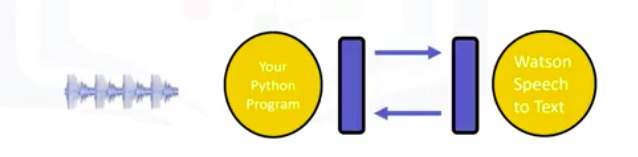

<p>Lets download the audio file that we will use to convert into text.</p>


In [7]:
# this code is apparently not downloding the file (the downloaded file is 0 Kb)
# file is already downloaded 
#!wget -O PolynomialRegressionandPipelines.mp3  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/PolynomialRegressionandPipelines.mp3

<p>We have the path of the .wav file we would like to convert to text</p>


In [8]:
filename='PolynomialRegressionandPipelines.mp3'

<p>We create the file object <code>wav</code> with the wav file using <code>open</code>. We set the <code>mode</code> to  "rb" ,  this is similar to read mode, but it ensures the file is in binary mode. The file object allows us access to the wav file that contains the audio. We use the method <code>recognize</code> to return the recognized text. This basically sends the audio file to Watson Speech to Text service. The parameter <code>audio</code> is the file object <code>wav</code>. The parameter <code>content_type</code> is the format of the audio file. The service sends a response stored in the object response.</p>


In [9]:
with open(filename, mode="rb")  as wav:
    response = s2t.recognize(audio=wav, content_type='audio/mp3')

<p>The attribute result contains a python dictionary. The key results value has a list that contains a dictionary. We are interested in the key transcript. </p>


In [10]:
response.result

{'result_index': 0,
 'results': [{'final': True,
   'alternatives': [{'transcript': 'in this video we will cover polynomial regression and pipelines ',
     'confidence': 0.94}]},
  {'final': True,
   'alternatives': [{'transcript': "what do we do when a linear model is not the best fit for our data let's look into another type of regression model the polynomial regression we transform our data into a polynomial then use linear regression to fit the parameters that we will discuss pipelines pipelines are way to simplify your code ",
     'confidence': 0.9}]},
  {'final': True,
   'alternatives': [{'transcript': "polynomial regression is a special case of the general linear regression this method is beneficial for describing curvilinear relationships what is a curvilinear relationship it's what you get by squaring or setting higher order terms of the predictor variables in the model transforming the data the model can be quadratic which means the predictor variable in the model is squar

In [11]:
from pandas import json_normalize

json_normalize(response.result['results'],"alternatives")

# need to update pandas 

0.23.4


In [13]:
response

<p>We can obtain the recognized text (a string with a transcribed text) and assign it to the variable <code>recognized_text</code>:</p>


In [14]:
recognized_text=response.result['results'][0]["alternatives"][0]["transcript"]
type(recognized_text)

str

<h2 id="ref1">Language Translator</h2>


<p>First we import <code>LanguageTranslatorV3</code> from ibm_watson. For more information on the API click <a href="https://cloud.ibm.com/apidocs/speech-to-text?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&code=python"> here</a></p>


In [15]:
from ibm_watson import LanguageTranslatorV3

<p>The service endpoint is based on the location of the service instance, we store the information in the variable url_lt. To find out which URL to use, view the service credentials.</p>


In [16]:
url_lt=

<p>You require an API key, and you can obtain the key on the <a href="https://cloud.ibm.com/resources?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01">Dashboard</a>.</p>


In [17]:
apikey_lt=

<p>API requests require a version parameter that takes a date in the format version=YYYY-MM-DD. This lab describes the current version of Language Translator, 2018-05-01</p>


In [18]:
version_lt='2018-05-01'

<p>we create a  Language Translator object <code>language_translator</code>:</p>


In [19]:
authenticator = IAMAuthenticator(apikey_lt)
language_translator = LanguageTranslatorV3(version=version_lt,authenticator=authenticator)
language_translator.set_service_url(url_lt)
language_translator

<p>We can get a Lists the languages that the service can identify.
The method Returns the language code.  For example English (en) to  Spanis (es) and name of each language.</p>


In [20]:
from pandas import json_normalize

json_normalize(language_translator.list_identifiable_languages().get_result(), "languages")

,language,name
0,af,Afrikaans
1,ar,Arabic
2,az,Azerbaijani
3,ba,Bashkir
4,be,Belarusian
...,...,...
71,uk,Ukrainian
72,ur,Urdu
73,vi,Vietnamese
74,zh,Simplified Chinese


<p>We can use the method <code>translate</code>. This will translate the text. The parameter text is the text, Model_id is the type of model we would like to use use we use list the language. In this case, we set it to 'en-es' or English to Spanish. We get a Detailed Response object translation_response</p>


In [21]:
translation_response = language_translator.translate(\
    text=recognized_text, model_id='en-es')
translation_response

<p>We use the method get result to get the translated text and assign it to the variable translation. The result is a dictionary that includes the translation word count and character count.</p>


In [22]:
translation=translation_response.get_result()
translation

{'translations': [{'translation': 'en este vídeo cubriremos la regresión polinómica y las tuberías '}],
 'word_count': 10,
 'character_count': 64}

<p>We can obtain the actual translation as a string as follows:</p>


In [23]:
spanish_translation =translation['translations'][0]['translation']
spanish_translation 

'en este vídeo cubriremos la regresión polinómica y las tuberías '

<p>We can translate back to English</p>


In [24]:
translation_new = language_translator.translate(text=spanish_translation ,model_id='es-en').get_result()

<p>The result is a dictionary. We can obtain the actual translation as a string as follows:</p>


In [25]:
translation_eng=translation_new['translations'][0]['translation']
translation_eng

'in this video we will cover the polynomial regression and the pipes '

<br>


<h2>Quiz</h2>


Translate to French.


In [ ]:
# Write your code below and press Shift+Enter to execute

French_translation=language_translator.translate(
    text=translation_eng , model_id='en-fr').get_result()

French_translation['translations'][0]['translation']

<details><summary>Click here for the solution</summary>

```python
French_translation=language_translator.translate(
    text=translation_eng , model_id='en-fr').get_result()

French_translation['translations'][0]['translation']

```

</details>


<h3>Language Translator</h3>


<b>References</b>


[https://cloud.ibm.com/apidocs/speech-to-text?code=python](https://cloud.ibm.com/apidocs/speech-to-text?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&code=python)


[https://cloud.ibm.com/apidocs/language-translator?code=python](https://cloud.ibm.com/apidocs/language-translator?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01&code=python)


<hr>
